<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploring-the-TensorFlow-Library" data-toc-modified-id="Exploring-the-TensorFlow-Library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploring the TensorFlow Library</a></span><ul class="toc-item"><li><span><a href="#Linear-Function" data-toc-modified-id="Linear-Function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear Function</a></span></li><li><span><a href="#Computing-the-sigmoid" data-toc-modified-id="Computing-the-sigmoid-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Computing the sigmoid</a></span></li><li><span><a href="#Computing-the-Cost" data-toc-modified-id="Computing-the-Cost-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Computing the Cost</a></span></li><li><span><a href="#using-One-Hot-Encodings" data-toc-modified-id="using-One-Hot-Encodings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>using One-Hot Encodings</a></span></li><li><span><a href="#Initialize-with-zeros-and-ones" data-toc-modified-id="Initialize-with-zeros-and-ones-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Initialize with zeros and ones</a></span></li></ul></li><li><span><a href="#Building-a-Neural-Network-with-TensorFlow" data-toc-modified-id="Building-a-Neural-Network-with-TensorFlow-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building a Neural Network with TensorFlow</a></span><ul class="toc-item"><li><span><a href="#Create-Placeholders" data-toc-modified-id="Create-Placeholders-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create Placeholders</a></span></li><li><span><a href="#Initialize-Parameters" data-toc-modified-id="Initialize-Parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialize Parameters</a></span></li><li><span><a href="#Forward-Propagation-with-TensorFlow" data-toc-modified-id="Forward-Propagation-with-TensorFlow-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Forward Propagation with TensorFlow</a></span></li><li><span><a href="#Computing-the-Cost" data-toc-modified-id="Computing-the-Cost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Computing the Cost</a></span></li><li><span><a href="#Building-the-model" data-toc-modified-id="Building-the-model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Building the model</a></span></li></ul></li></ul></div>

# TensorFlow Tutorial

## Exploring the TensorFlow Library

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
np.random.seed(1)

C:\Users\pakon\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pakon\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pakon\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pakon\Anaconda3\envs\deeplearning\lib\site-

We will start with an example, where we compute the loss of one training example. 

$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [2]:
y_hat = tf.constant(36, name='y_hat')
y = tf.constant(39, name='y')               
loss = tf.Variable((y - y_hat)**2, name='loss') 
init = tf.global_variables_initializer()    
with tf.Session() as session:                   
    session.run(init)      
    print(session.run(loss)) 

Instructions for updating:
Colocations handled automatically by placer.
9


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
sess = tf.Session()
print(sess.run(c))

20


In [4]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


### Linear Function

Lets start this programming exercise by computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 

**Exercise**: Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```


In [5]:
def linear_function():
    np.random.seed(1)
    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    Y = tf.add(tf.matmul(W, X), b)
    sess = tf.Session()
    result = sess.run(Y)
    sess.close()
    return result

In [6]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


### Computing the sigmoid

In [7]:
def sigmoid(z):
    x = tf.placeholder(tf.float32, name = "x")
    sigmoid = tf.sigmoid(x, name='sigmoid')
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict = {x:z})
    return result

In [8]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


### Computing the Cost

You can also use a built-in function to compute the cost of your neural network. So instead of needing to write code to compute this as a function of $a^{[2](i)}$ and $y^{(i)}$ for i=1...m: 

$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

you can do it in one line of code in tensorflow.

In [9]:
def cost(logits, labels):
    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)
    sess = tf.Session()
    cost = sess.run(cost, feed_dict = {z:logits, y:labels})
    sess.close()
    return cost

In [10]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366408  0.41385433 0.39956617]


### using One-Hot Encodings

In [11]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name='C')
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    return one_hot

In [12]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### Initialize with zeros and ones

In [13]:
def ones(shape):
    ones = tf.ones(shape)
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    return ones

In [14]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


## Building a Neural Network with TensorFlow

In [18]:
tr_p = 'train_signs.h5'
te_p = 'test_signs.h5'
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset(tr_p, te_p)

y = 5


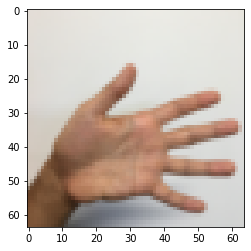

In [19]:
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [20]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


### Create Placeholders

In [21]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=(n_x,None), name='Placeholder_1')
    Y = tf.placeholder(tf.float32, shape=(n_y,None), name='Placeholder_2')
    return X, Y

In [22]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_2:0", shape=(6, ?), dtype=float32)


### Initialize Parameters

In [23]:
def initialize_parameters():
    tf.set_random_seed(1) 
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1, "b1": b1, "W2": W2,
                  "b2": b2, "W3": W3, "b3": b3}
    return parameters

In [24]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


### Forward Propagation with TensorFlow

In [25]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X),b1)                                        
    A1 = tf.nn.relu(Z1)                                     
    Z2 = tf.add(tf.matmul(W2, A1),b2)                          
    A2 = tf.nn.relu(Z2)                                      
    Z3 = tf.add(tf.matmul(W3, A2),b3)                                      
    return Z3

In [26]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


### Computing the Cost

In [27]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = labels))
    return cost

In [28]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


###  Building the model

In [29]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()                   
    tf.set_random_seed(1)                             
    seed = 3                                          
    (n_x, m) = X_train.shape                          
    n_y = Y_train.shape[0]                            
    costs = []                                        
    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):

            epoch_cost = 0.                 
            num_minibatches = int(m / minibatch_size) 
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer,cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches

            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        return parameters

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.017255
Cost after epoch 200: 0.733184
Cost after epoch 300: 0.573071
Cost after epoch 400: 0.468573
Cost after epoch 500: 0.381228
Cost after epoch 600: 0.313819
Cost after epoch 700: 0.253700
Cost after epoch 800: 0.203889
Cost after epoch 900: 0.166454
Cost after epoch 1000: 0.146623
Cost after epoch 1100: 0.107289
Cost after epoch 1200: 0.086534
Cost after epoch 1300: 0.059361
Cost after epoch 1400: 0.052228


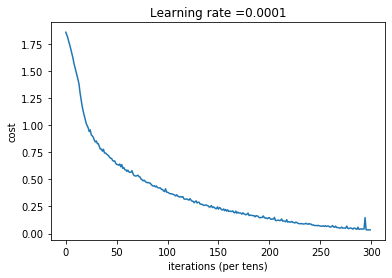

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [30]:
parameters = model(X_train, Y_train, X_test, Y_test)